In [1]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=b73b36b3d9e87f2ead1865e74d66780dde586ef6b69170ac1000427058dec679
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [5]:
import deepface
deepface.__version__

'0.0.93'

In [7]:
import matplotlib
matplotlib.__version__

'3.10.0'

In [8]:
cv2.__version__

'4.11.0'

In [3]:
import cv2
import os
import matplotlib.pyplot as plt
from deepface import DeepFace

# uncomment if you run the programm for the first time

# from google.colab import drive
# drive.mount('/content/gdrive')

25-03-03 10:55:25 - Directory /root/.deepface has been created
25-03-03 10:55:25 - Directory /root/.deepface/weights has been created


In [ ]:
def convert_to_black_and_white(image_path, output_path):
    # Read the image from the specified path
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Could not read the image.")
        return

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Save the black and white image to the specified output path
    cv2.imwrite(output_path, gray_image)

def process_images_in_folder(folder_path, output_folder, file_extension='.jpg'):
    # Убедитесь, что выходная папка существует
    os.makedirs(output_folder, exist_ok=True)

    # Проход по всем файлам и папкам в указанной папке
    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            if filename.endswith(file_extension):
                input_path = os.path.join(root, filename)

                # Создание соответствующей структуры папок в выходной папке
                relative_path = os.path.relpath(root, folder_path)
                output_dir = os.path.join(output_folder, relative_path)
                os.makedirs(output_dir, exist_ok=True)

                output_path = os.path.join(output_dir, f"{filename}")
                convert_to_black_and_white(input_path, output_path)

def run_tests(results):
    path_to_tests = "/content/gdrive/MyDrive/ML_prof10"
    num_tests = 4
    for i in range(1, num_tests + 1):
        target_image_path = f"{path_to_tests}/test{i}.jpg"
        results = DeepFace.find(img_path=target_image_path,
                  db_path=database_path,
                  model_name="ArcFace",
                  detector_backend="retinaface")
        if results:
            print("Prediction:", results[0].iloc[0]["identity"].split("/")[-2])

            plt.figure(figsize=(10, 5))  # Set the figure size

            # Display the first image
            plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
            plt.imshow(cv2.imread(target_image_path))

            # Display the second image
            plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
            plt.imshow(cv2.imread(results[0].iloc[0]["identity"]))

            # Show the combined images
            plt.tight_layout()  # Adjust layout to prevent overlap
            plt.show()
        else:
            print("No matches found.")

In [ ]:
input_folder = '/content/gdrive/MyDrive/ML_prof10'
output_folder = '/content/gdrive/MyDrive/ML_prof10'
process_images_in_folder(input_folder, output_folder, file_extension='.jpg')

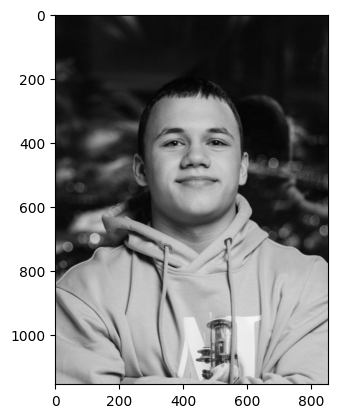

In [ ]:
img = cv2.imread("/content/gdrive/MyDrive/ML_prof10/test1.jpg")
plt.imshow(img)
plt.show()

In [ ]:
# Path to the image you want to find matches for
target_image_path = "/content/gdrive/MyDrive/ML_prof10/photo_5343581534550093804_y.jpg"

# Path to the directory containing images to search in
database_path = "/content/gdrive/MyDrive/ML_prof10/database_raw"

# Perform the face recognition
results = DeepFace.find(img_path=target_image_path,
              db_path=database_path,
              model_name="ArcFace",
              detector_backend="retinaface")

# Print the results
results

25-03-02 14:30:06 - Found 0 newly added image(s), 1 removed image(s), 3 replaced image(s).


Finding representations: 100%|██████████| 3/3 [00:24<00:00,  8.33s/it]


25-03-02 14:30:31 - There are now 3 representations in ds_model_arcface_detector_retinaface_aligned_normalization_base_expand_0.pkl
25-03-02 14:30:31 - Searching /content/gdrive/MyDrive/ML_prof10/photo_5343581534550093804_y.jpg in 3 length datastore
25-03-02 14:30:40 - find function duration 34.158010959625244 seconds


[                                            identity  \
 0  /content/gdrive/MyDrive/ML_prof10/database_raw...   
 1  /content/gdrive/MyDrive/ML_prof10/database_raw...   
 
                                        hash  target_x  target_y  target_w  \
 0  68668e43e71b7c297b92fb820a42fa0f424d9e05       192       279       557   
 1  b05d5e88a2ea09254e689c0a9b04cd27e472840a       203        73       176   
 
    target_h  source_x  source_y  source_w  source_h  threshold  distance  
 0       676       115       240       374       470       0.68  0.226495  
 1       209       115       240       374       470       0.68  0.255615  ,
                                             identity  \
 0  /content/gdrive/MyDrive/ML_prof10/database_raw...   
 
                                        hash  target_x  target_y  target_w  \
 0  95c14af1cd69ee8cff4be60b01faf6eb46b2af5a       169       115       231   
 
    target_h  source_x  source_y  source_w  source_h  threshold  distance  
 0       293

daniil


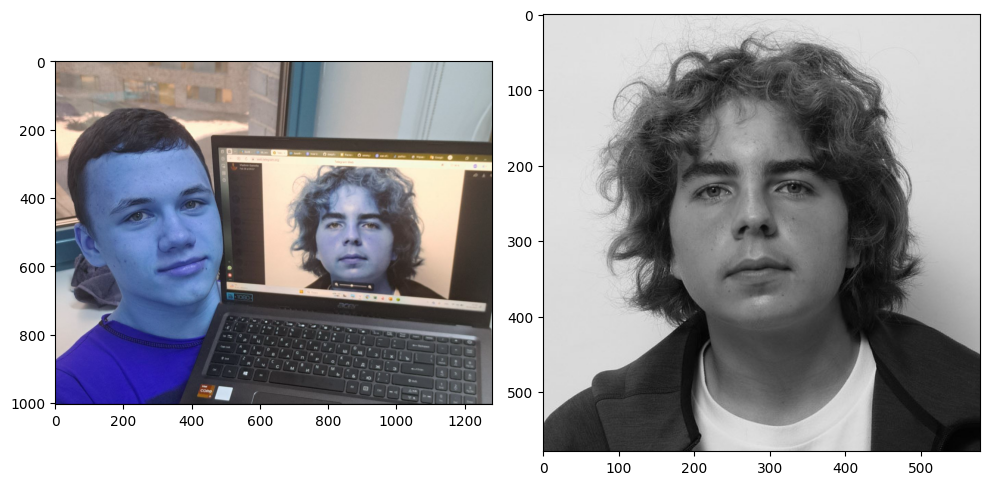

In [ ]:
if results:
    print(results[1].iloc[0]["identity"].split("/")[-2])

    plt.figure(figsize=(10, 5))  # Set the figure size

    # Display the first image
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
    plt.imshow(cv2.imread(target_image_path))

    # Display the second image
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
    plt.imshow(cv2.imread(results[0].iloc[0]["identity"]))

    # Show the combined images
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
else:
    print("No matches found.")

25-03-02 14:46:37 - Found 0 newly added image(s), 0 removed image(s), 3 replaced image(s).


Finding representations: 100%|██████████| 3/3 [00:25<00:00,  8.63s/it]


25-03-02 14:47:02 - There are now 3 representations in ds_model_arcface_detector_retinaface_aligned_normalization_base_expand_0.pkl
25-03-02 14:47:02 - Searching /content/gdrive/MyDrive/ML_prof10/test1.jpg in 3 length datastore
25-03-02 14:47:10 - find function duration 33.931947231292725 seconds
Prediction: andrew


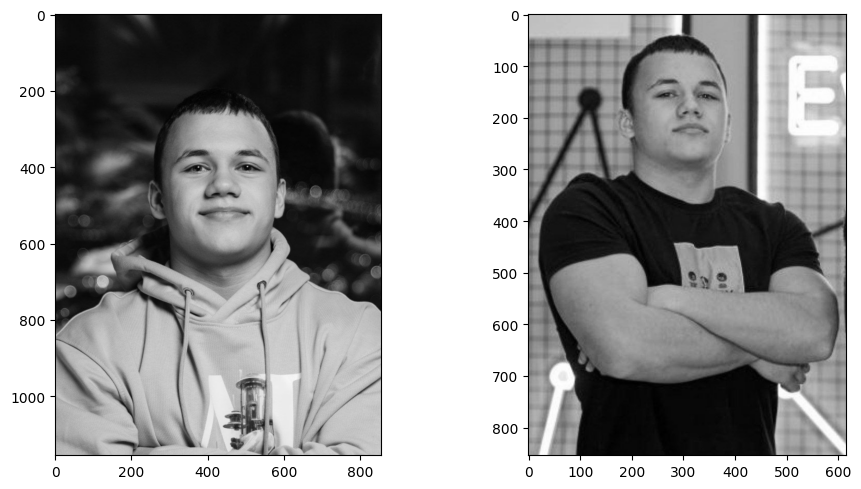

25-03-02 14:47:11 - Found 0 newly added image(s), 0 removed image(s), 3 replaced image(s).


Finding representations: 100%|██████████| 3/3 [00:25<00:00,  8.48s/it]


25-03-02 14:47:36 - There are now 3 representations in ds_model_arcface_detector_retinaface_aligned_normalization_base_expand_0.pkl
25-03-02 14:47:36 - Searching /content/gdrive/MyDrive/ML_prof10/test2.jpg in 3 length datastore
25-03-02 14:47:45 - find function duration 33.948612451553345 seconds
Prediction: andrew


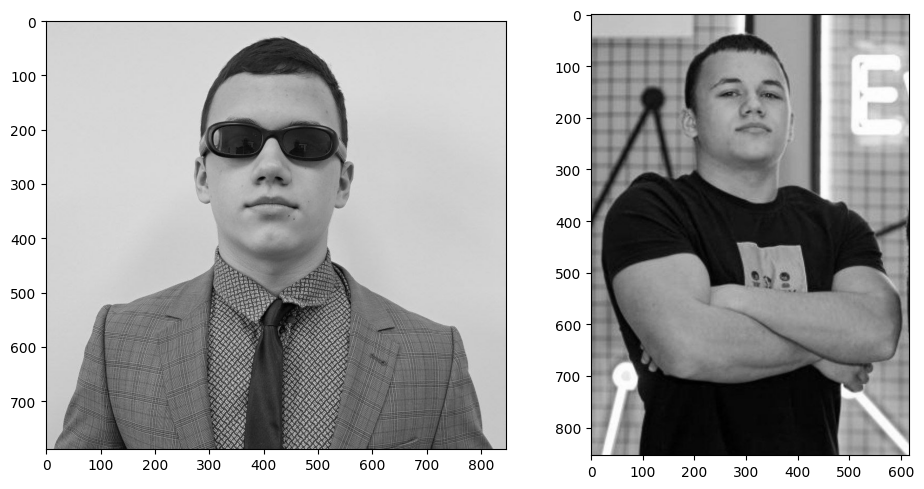

25-03-02 14:47:46 - Found 0 newly added image(s), 0 removed image(s), 3 replaced image(s).


Finding representations: 100%|██████████| 3/3 [00:23<00:00,  7.96s/it]


25-03-02 14:48:09 - There are now 3 representations in ds_model_arcface_detector_retinaface_aligned_normalization_base_expand_0.pkl
25-03-02 14:48:09 - Searching /content/gdrive/MyDrive/ML_prof10/test3.jpg in 3 length datastore
25-03-02 14:48:18 - find function duration 31.99373507499695 seconds
Prediction: daniil


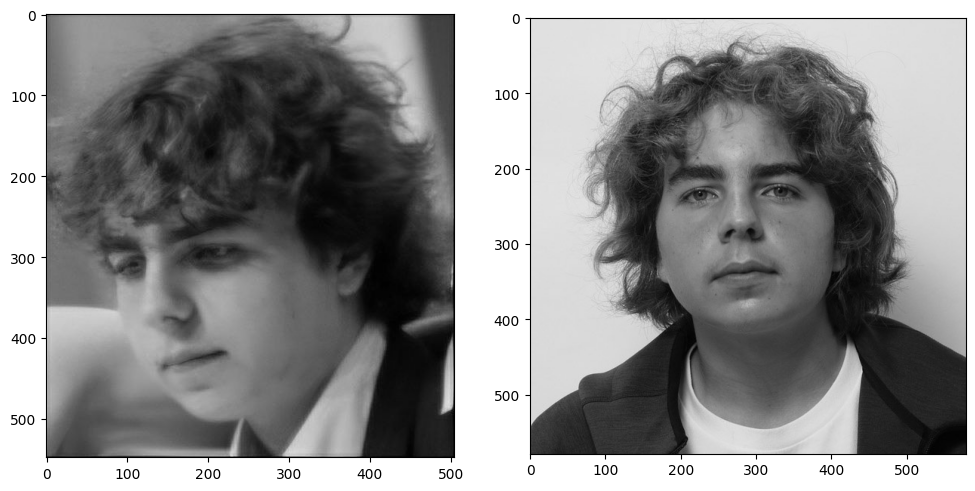

25-03-02 14:48:18 - Found 0 newly added image(s), 0 removed image(s), 3 replaced image(s).


Finding representations: 100%|██████████| 3/3 [00:24<00:00,  8.08s/it]


25-03-02 14:48:42 - There are now 3 representations in ds_model_arcface_detector_retinaface_aligned_normalization_base_expand_0.pkl
25-03-02 14:48:42 - Searching /content/gdrive/MyDrive/ML_prof10/test4.jpg in 3 length datastore
25-03-02 14:48:50 - find function duration 31.665345430374146 seconds
Prediction: daniil


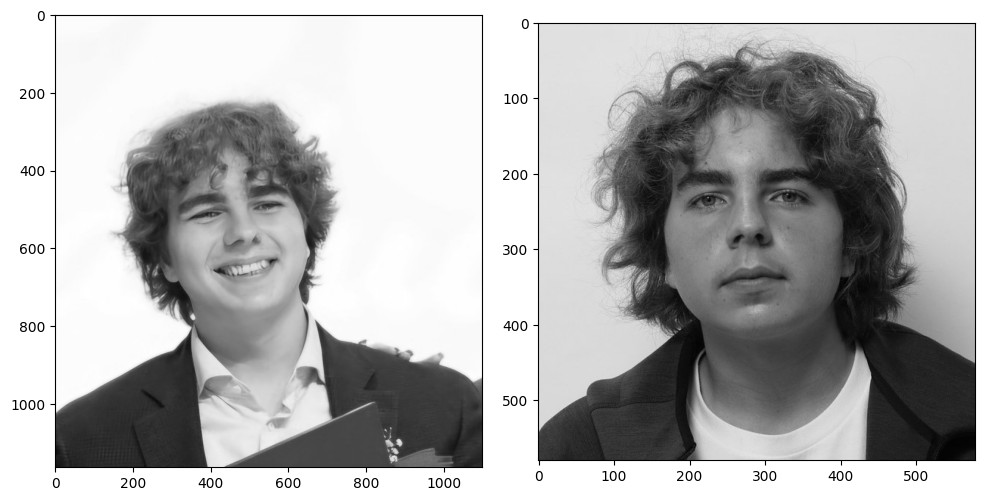

In [ ]:
path_to_tests = "/content/gdrive/MyDrive/ML_prof10"
num_tests = 4
for i in range(1, num_tests + 1):
    target_image_path = f"{path_to_tests}/test{i}.jpg"
    results = DeepFace.find(img_path=target_image_path,
              db_path=database_path,
              model_name="ArcFace",
              detector_backend="retinaface")
    if results:
        print("Prediction:", results[0].iloc[0]["identity"].split("/")[-2])

        plt.figure(figsize=(10, 5))  # Set the figure size

        # Display the first image
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        plt.imshow(cv2.imread(target_image_path))

        # Display the second image
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        plt.imshow(cv2.imread(results[0].iloc[0]["identity"]))

        # Show the combined images
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()
    else:
        print("No matches found.")